### Importing Library


In [21]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [23]:
stdata=pd.read_excel("C:/Users/dilee/Downloads/student_dataset.xlsx")

In [24]:
stdata

,S.NO,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT,TOTAL,CERTIFICATE
0,1,20,38,25,83,DISTINCTION
1,2,15,25,0,40,COMPLETION
2,3,20,31,25,76,FIRST CLASS
3,4,20,25,25,70,FIRST CLASS
4,5,20,17,15,52,FIRST CLASS
...,...,...,...,...,...,...
362,363,15,0,10,25,PARTICIPATION
363,364,20,9,25,54,COMPLETION
364,365,15,20,25,60,FIRST CLASS
365,366,15,0,10,25,PARTICIPATION


### Cleaning the Dataset

In [25]:
stdata=stdata.drop(['S.NO','TOTAL'],axis=1)

In [26]:
stdata

,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT,CERTIFICATE
0,20,38,25,DISTINCTION
1,15,25,0,COMPLETION
2,20,31,25,FIRST CLASS
3,20,25,25,FIRST CLASS
4,20,17,15,FIRST CLASS
...,...,...,...,...
362,15,0,10,PARTICIPATION
363,20,9,25,COMPLETION
364,15,20,25,FIRST CLASS
365,15,0,10,PARTICIPATION


### Understanding The Dataset

In [27]:
stdata['CERTIFICATE'].unique()

array(['DISTINCTION', 'COMPLETION', 'FIRST CLASS', 'PARTICIPATION'],
      dtype=object)

In [28]:
stdata.shape

(367, 4)

In [29]:
stdata.groupby('CERTIFICATE').size()

CERTIFICATE
COMPLETION       117
DISTINCTION       32
FIRST CLASS       66
PARTICIPATION    152
dtype: int64

<AxesSubplot:xlabel='CERTIFICATE', ylabel='count'>

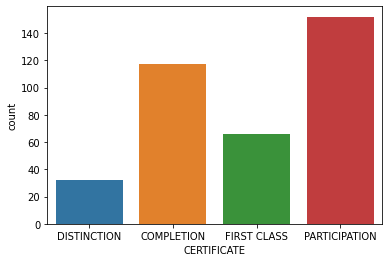

In [30]:
sns.countplot(stdata['CERTIFICATE'],label='count')

### Segregation

In [31]:
x=stdata.drop(['CERTIFICATE'],axis=1)
x

,ATTENDANCE,THEORY EXAM,DAILY ASSESSMENT
0,20,38,25
1,15,25,0
2,20,31,25
3,20,25,25
4,20,17,15
...,...,...,...
362,15,0,10
363,20,9,25
364,15,20,25
365,15,0,10


In [32]:
y=stdata.iloc[:,-1].values.reshape(-1,1)

In [33]:
y

array([['DISTINCTION'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['PARTICIPATION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['PARTICIPATION'],
       ['DISTINCTION'],
       ['COMPLETION'],
       ['PARTICIPATION'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['PARTICIPATION'],
       ['FIRST CLASS'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['COMPLETION'],
       ['DISTINCTION'],
       ['FIRST CLASS'],
       ['DISTINCTION'],
       ['COMPLETION'],


### Splitting into Training and Testing

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [36]:
x_train.shape

(275, 3)

In [37]:
x_test.shape

(92, 3)

In [39]:
y_train.shape

(275, 1)

In [40]:
y_test.shape

(92, 1)

### Classifier Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
DC=DecisionTreeClassifier(criterion='entropy')

In [43]:
DC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

### Prediction

In [44]:
y_predic=DC.predict(x_test)

In [45]:
y_predic

array(['PARTICIPATION', 'DISTINCTION', 'PARTICIPATION', 'PARTICIPATION',
       'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION',
       'PARTICIPATION', 'COMPLETION', 'PARTICIPATION', 'COMPLETION',
       'PARTICIPATION', 'DISTINCTION', 'COMPLETION', 'DISTINCTION',
       'COMPLETION', 'FIRST CLASS', 'DISTINCTION', 'PARTICIPATION',
       'PARTICIPATION', 'PARTICIPATION', 'DISTINCTION', 'FIRST CLASS',
       'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION', 'COMPLETION',
       'COMPLETION', 'FIRST CLASS', 'PARTICIPATION', 'FIRST CLASS',
       'PARTICIPATION', 'COMPLETION', 'COMPLETION', 'COMPLETION',
       'FIRST CLASS', 'PARTICIPATION', 'PARTICIPATION', 'COMPLETION',
       'COMPLETION', 'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION',
       'FIRST CLASS', 'COMPLETION', 'COMPLETION', 'COMPLETION',
       'PARTICIPATION', 'PARTICIPATION', 'PARTICIPATION', 'FIRST CLASS',
       'PARTICIPATION', 'FIRST CLASS', 'PARTICIPATION', 'PARTICIPATION',
       'COMPLETION

### Actual Vs Predicted

In [46]:
final=pd.DataFrame(y_test,columns=["Actual"])

In [47]:
final['Predicted']=y_predic

In [48]:
final

,Actual,Predicted
0,PARTICIPATION,PARTICIPATION
1,COMPLETION,DISTINCTION
2,COMPLETION,PARTICIPATION
3,PARTICIPATION,PARTICIPATION
4,PARTICIPATION,PARTICIPATION
...,...,...
87,FIRST CLASS,FIRST CLASS
88,PARTICIPATION,PARTICIPATION
89,PARTICIPATION,COMPLETION
90,COMPLETION,COMPLETION


In [49]:
final.groupby('Actual').size()

Actual
COMPLETION       23
DISTINCTION       7
FIRST CLASS      17
PARTICIPATION    45
dtype: int64

In [50]:
final.groupby('Predicted').size()

Predicted
COMPLETION       28
DISTINCTION       7
FIRST CLASS      13
PARTICIPATION    44
dtype: int64

### Performance Matrics

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
acc=accuracy_score(y_test, y_predic)
acc

0.6847826086956522

In [56]:
a=confusion_matrix(y_test,y_predic)
a

array([[15,  2,  1,  5],
       [ 0,  2,  5,  0],
       [ 7,  3,  7,  0],
       [ 6,  0,  0, 39]], dtype=int64)

In [57]:
mat=pd.DataFrame(a,columns=['Comp','Dist','FC','Part'],index=['Comp','Dist','FC','Part'])
mat

,Comp,Dist,FC,Part
Comp,15,2,1,5
Dist,0,2,5,0
FC,7,3,7,0
Part,6,0,0,39


### Visualisation

In [59]:
from sklearn import tree

In [60]:
z=DC.fit(x_train,y_train)

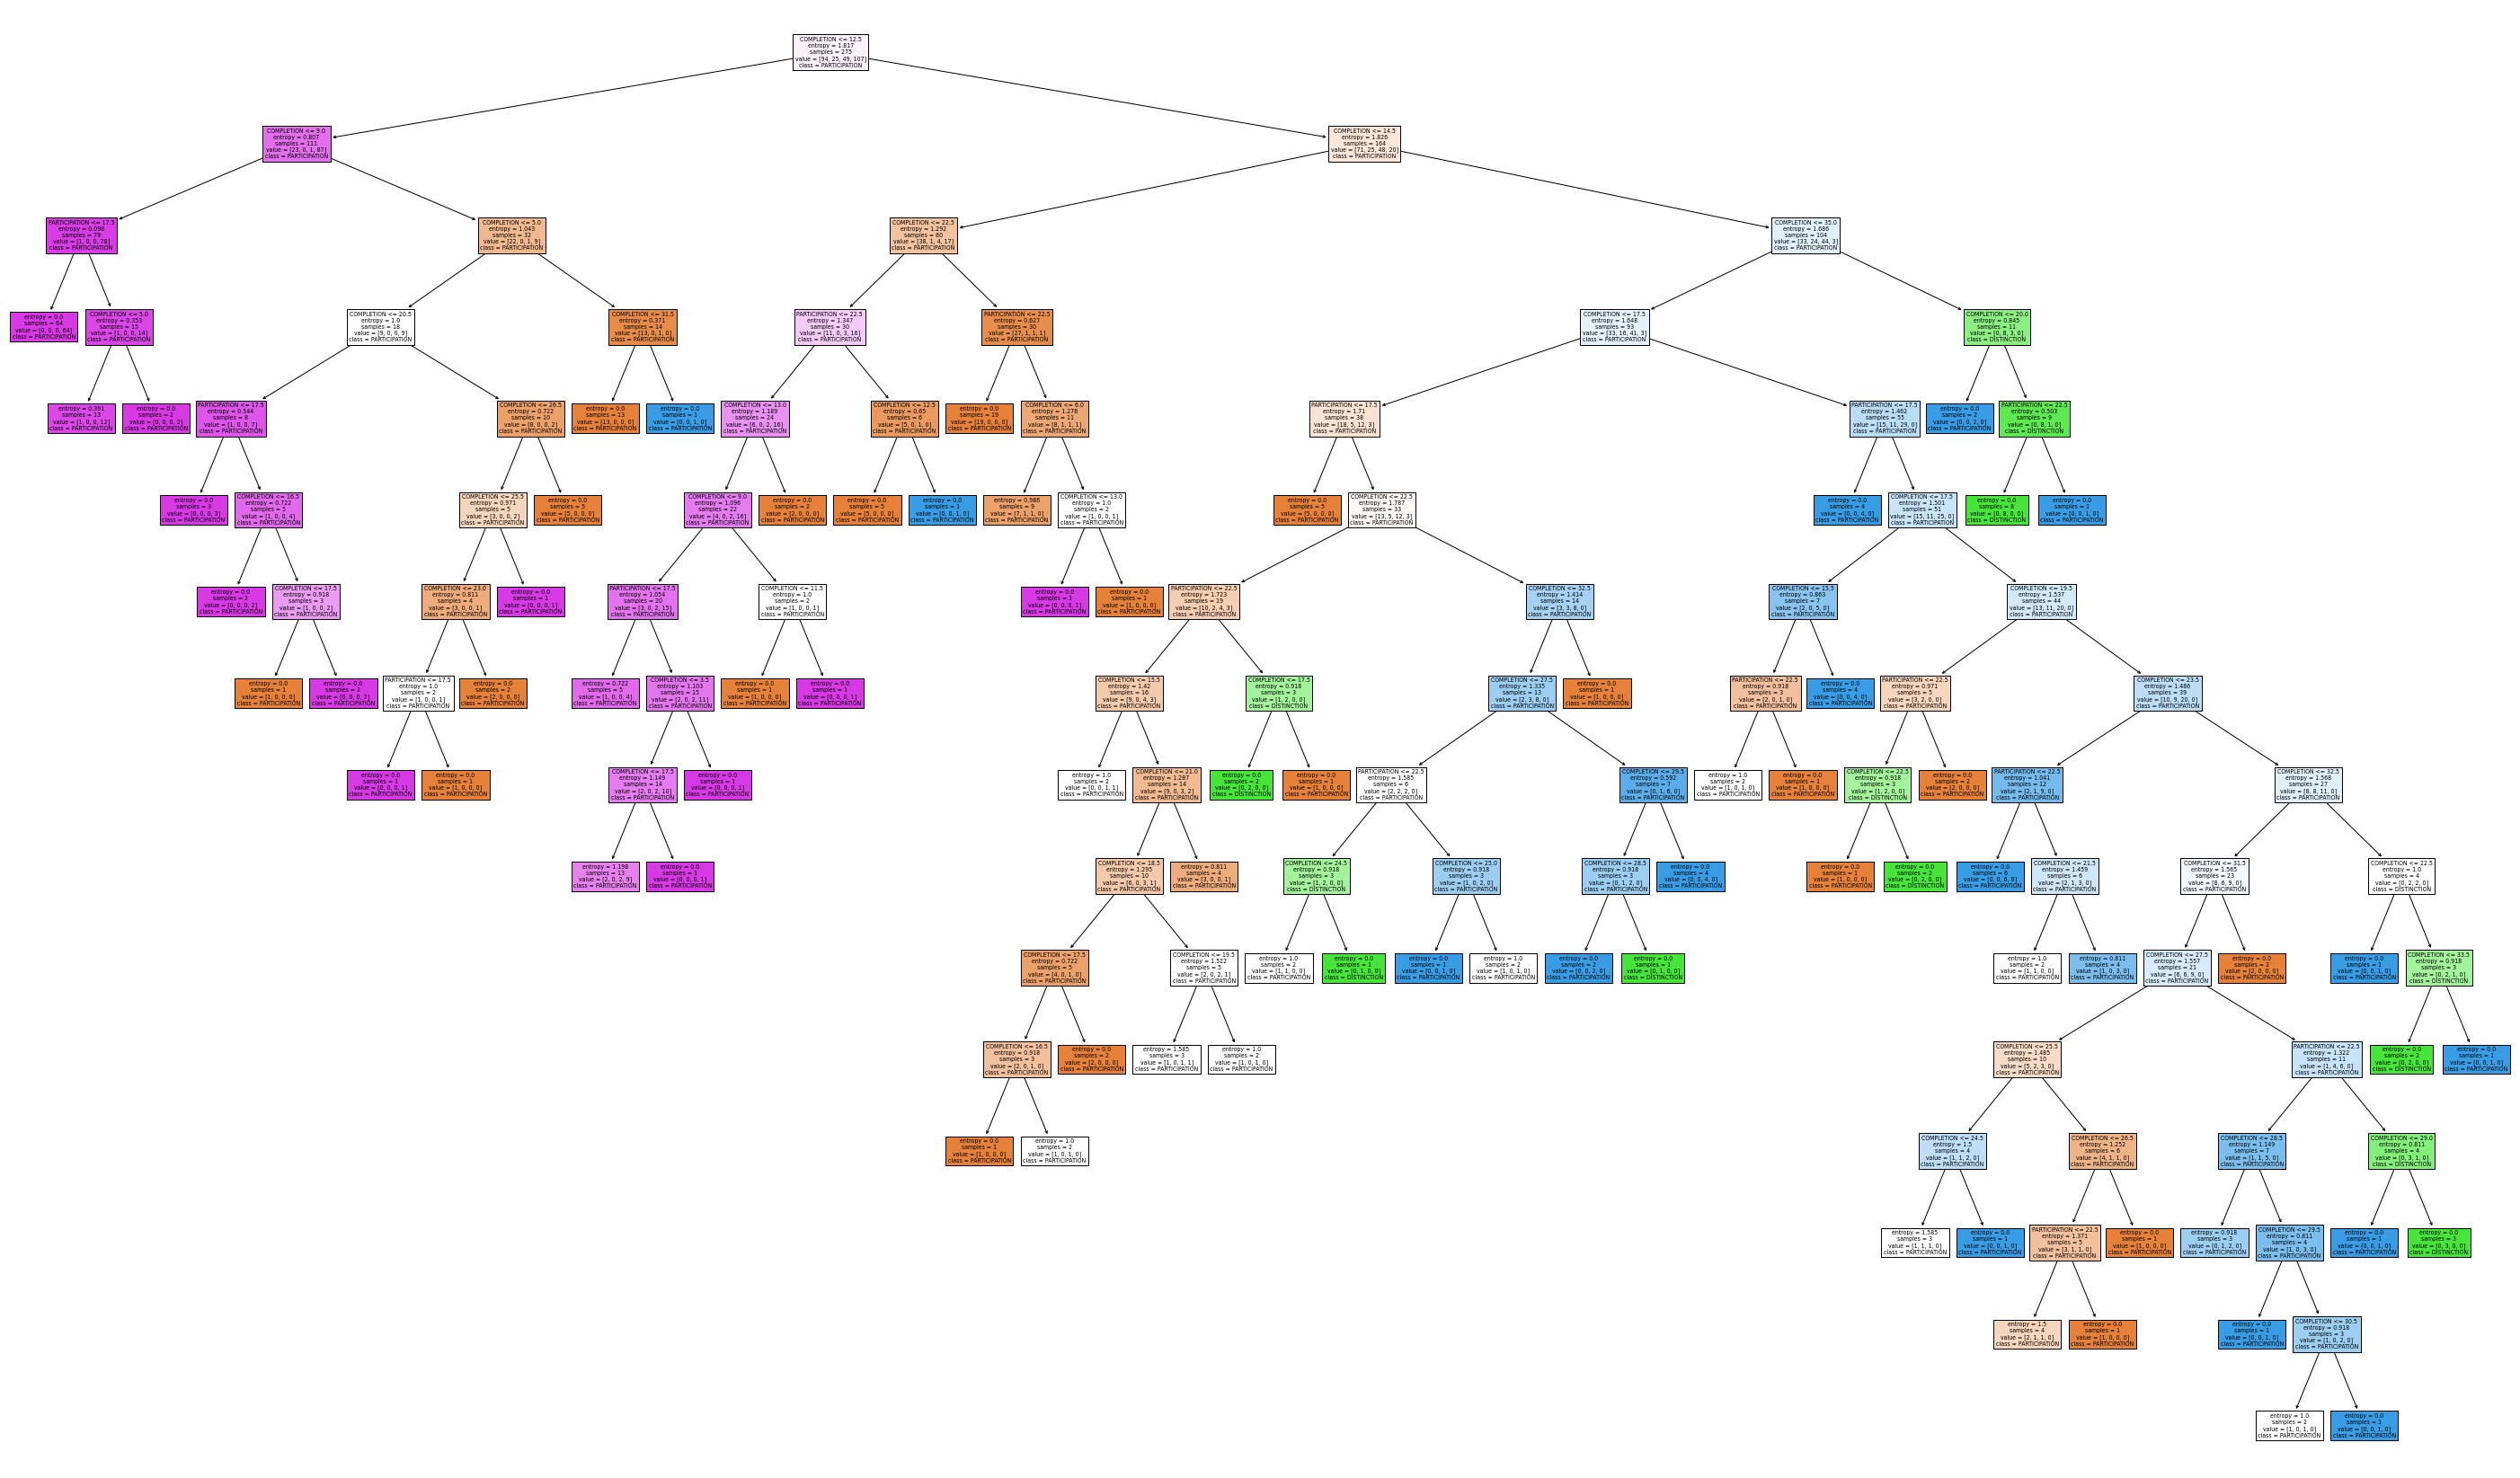

In [63]:
fig=plt.figure(figsize=(50,30))
_ = tree.plot_tree(z,feature_names = final.Actual, class_names = final.Predicted, filled = True)